<div class="alert alert-block alert-warning">

# <p style="text-align: center;">Lab 2: Linear Regression and Logistic Regression</p>
<div style="text-align: center;">
<img src="data/thumbnail.png" width="528" height="250" />
</div>

Welcome to your second lab! Labs in this unit will run as a help desk and they are not mandatory to attend.

This notebook contains all the code and comments that you need to submit. Here are the instructions (same as Lab 1) to complete this lab:

- This notebook is to be done alongside '**Lab 2 Quiz**' in Moodle. Your grade is based on notebook completion and quiz attempt.
- After completing the quiz, submit this notebook to Moodle under '**Lab 2 Submission**'.
- The quiz has no time limit (until deadline), but only 1 attempt. Quiz will not be re-opened.
- If the notebook is not submitted, no marks will be given for the lab.
- IMPORTANT: Some parts of the notebook will be auto-graded, therefore please do not edit/rename the already-given variable/function/class names.

This lab has three tasks. The first two tasks test your basic knowledge regarding the linear and logistic regression and their applications. In the last task, you will analyse the results.

- [Task 1: Simple linear regression](#simple-linear-regression)
- [Task 2: Logistic Regression and Gradient Descent](#logistic-gd)
- [Task 3: Analysing convergence and accuracy](#analyse-convergence-and-accuracy)

In [82]:
# Libraries, you do not need to import any additional libraries for this lab

import numpy as np ## Numpy is the fundamental building block of understanding tensor (matrices) within Python
import matplotlib.pyplot as plt ## Matplotlib.pyplot is the graphing library that we will be using throughout the semester

<div class="alert alert-block alert-info">

## Task 1 - Simple linear regression <a class="anchor" id="simple-linear-regression"></a>
In this section, you are going to implement a simple linear regression function and write code to visualise the line of regression using the trained linear regression model.

### Learning Outcome 
By the end of this task, you will:
- Formulate a simple linear regression equation $y = wx + b$.
- Implement the Least Squares Regression method to find the estimated slope $\hat{w}$ and intercept $\hat{b}$ of the regression line, minimizing the square distances from each sample to the line.
- Apply the developed simple linear regression function to samples of different distributions.
- Visualize and analyze the performance of the linear regression model on the given samples to understand how well it fits the data.

<div class="alert alert-block alert-info">

### 1.1 Simple linear regression formulation <a class="anchor" id="lr-formulation"></a>

Let's consider a simple linear regression problem with one independent variable $x$ and one dependent variable $y$ (univariate). The simple linear regression equation we will use is written below.

$$y=wx+b$$

We are going to use the **Least Squares Regression** to solve the problem. For a given set of data $(X,Y)$, where $X = \{x_1, x_2, ... x_m\}$ and $Y = \{y_1, y_2, ... y_m\}$, the equations are given:

To estimate the slope $w$ of the regression line:

$$\hat{w}=\frac{\sum^{m}_{i=1}(x_i-\bar{x})(y_i-\bar{y})}{\sum^{m}_{i=1}(x_i-\bar{x})^{2}}$$

To estimate the intercept $b$ of the regression line:

$$\hat{b}=\bar{y}-\hat{w}\bar{x}$$

Here, $\bar{x}$ and $\bar{y}$ are the mean values of the data points in $X$ and $Y$, respectively.

### Write a simple linear regression function

In this task, you are now first asked to write a function that takes $n$ samples in the form of $(x_i,y_i)$ as inputs and computes the slope $w$ and intercept $b$ of the regression line. (Assuming both $x$ and $y$ are 2D where the samples are on the rows and features are on columns)</br>


The input to your function is denoted X and Y, where X is a 2D array of shape $(n,1)$ and Y is a 2D array of shape $(n,1)$ as well. The output of your function is denoted $w$ and $b$, where $w$ is the slope of the regression line and $b$ is the intercept of the regression line. 

_Hint_: Use the _numpy_ library you have been introduced to in the previous lab to allow easy computation of multi-dimensional input values as well.

In [83]:
# T1.1 IMPORTANT: Please do not edit/remove this comment.

# Implement the linear regression function (Assuming both X and Y are 2D)
def linear_regression(X, Y):
    # The shape of X is (n,1), where n is the number of samples
    # The shape of Y is (n,1), where n is the number of samples
    X_bar = np.mean(X, axis=0)
    Y_bar = np.array(Y.mean())
    # Y_bar = np.mean(Y, axis=0)
    # print(X_bar)
    # print(Y_bar)
    num_w = np.matmul((X-X_bar).T, (Y-Y_bar)).sum()
    denom_w = ((X-X_bar)**2).sum()
    w = np.array([num_w / denom_w])
    b = Y_bar - (w*X_bar)
    return w, b

<div class="alert alert-block alert-info">

### 1.2 Test and visualise the linear regression <a class="anchor" id="test-lr"></a>

With the function you wrote in section 1.1, let's test your linear regression function.

**(a) We first load and visualise the samples.**

Load the data, then select the correct range according to the quiz.

Then visualise the data.

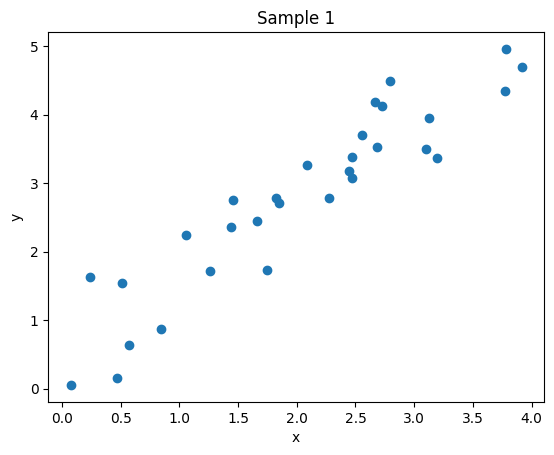

In [84]:
# T1.2a IMPORTANT: Please do not edit/remove this comment.

# Load numpy dataset from lab2_task1_sample1.npz
# Hint: use np.load()
loaded_sample1 = np.load('data/lab2_task1_sample1.npz')

# Create train and test datasets
# Data was saved in a dictionary-liked form, where the keys are ('arr_0','arr_1')
# Load the values into correct variables according to the following mapping.
# (X1 <-- arr_0, Y1 <-- arr_1)
X1 = loaded_sample1['arr_0']
Y1 = loaded_sample1['arr_1']

# print(X1, Y1)

# select correct range for X1 and Y1 and reshape the new array to be proper for linear regression() function
X1 = X1[20:51].reshape(-1,1) 
Y1 = Y1[20:51].reshape(-1,1) 

# print(np.size(X1))
# print(np.size(Y1))

plt.scatter(X1,Y1)
plt.title('Sample 1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**(b) Now find parameters of the regression line with the given samples and your linear regression function.**

In [85]:
# T1.2b IMPORTANT: Please do not edit/remove this comment.

## Find the slope and intercept of the regression line using your linear regression function on X1 and Y1
w1, b1 = linear_regression(X1,Y1)
print(w1, b1)

[1.13013791] [0.50620695]


**(c) Now let's try it on a different set of samples.**

Load the new samples, select the correct range according to the quiz and visualise them.

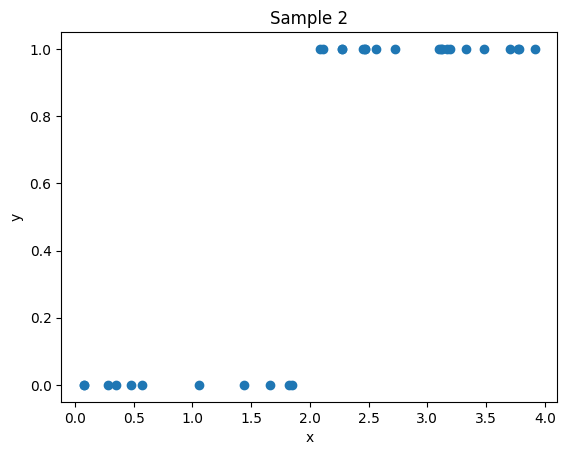

In [86]:
# T1.2c IMPORTANT: Please do not edit/remove this comment.

# Load numpy dataset from lab2_task1_sample2.npz
# Hint: use np.load()
loaded_sample2 = np.load('data/lab2_task1_sample2.npz')

# Create train and test datasets
# Data was saved in a dictionary-liked form, where the keys are ('arr_0','arr_1')
# Load the values into correct variables according to the following mapping.
# (X2 <-- arr_0, Y2 <-- arr_1)
X2 = loaded_sample2['arr_0']
Y2 = loaded_sample2['arr_1']

# select correct range for X1 and Y1 and reshape the new array to be proper for linear regression() function
X2 = X2[10:41].reshape(-1,1) 
Y2 = Y2[10:41].reshape(-1,1) 

# Show samples as a scatter plot
plt.scatter(X2,Y2)
plt.title('Sample 2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Then find the parameters of the regression line with the new samples and your linear regression function.

In [87]:
## Find the slope and intercept of the regression line using your linear regression function
w2, b2 = linear_regression(X2,Y2)
print(w2, b2)

[0.34831578] [-0.12741893]


<div class="alert alert-block alert-success">

#### Reflection

Follow the instrctions below to make some plots that will aid you to answer the quiz question.

**(d) Use your experience with numpy and matplotlib from the previous lab to make two plots (as a 1x2 subplot):**
- **Subplot one**: plot the data points of (X1, Y1) and the regression line from this dataset
- **Subplot two**: plot the data points of (X2, Y2) and the regression line from this dataset

Visualise the regression line in the domain **$x \in [0, 4]$.**

To make the plots clearer, you can try to:
- Visualise the regression line as a **line plot in <font color='red'>red</font> colour**.
- Visualise the samples as a **scatter plot in <font color='blue'>blue</font> colour**.

Use **50 data points** on the line to make it smooth, and make sure to add an appropriate **plot title** and to **label the axes**!</br>

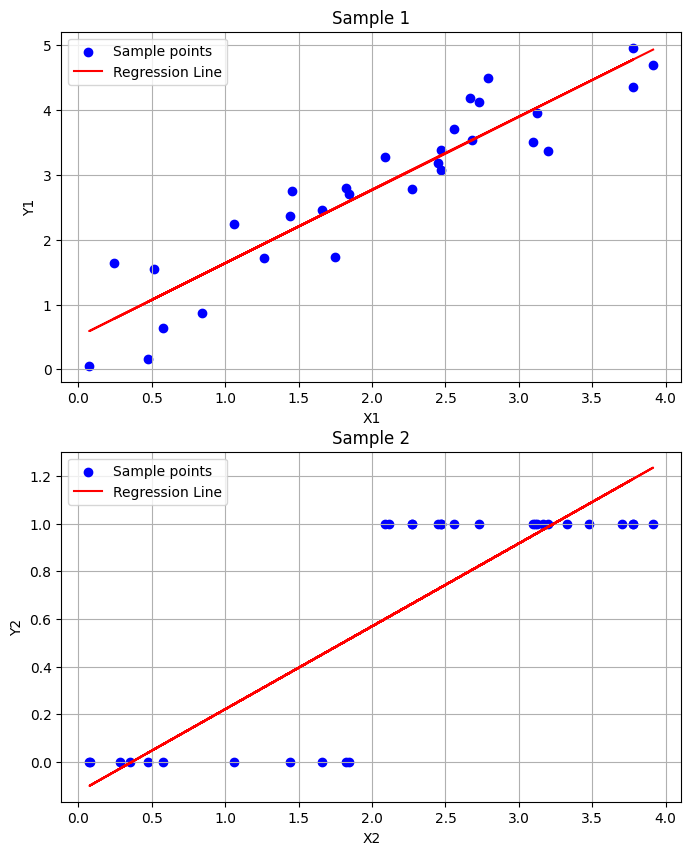

In [88]:
# T1.2d IMPORTANT: Please do not edit/remove this comment.

## Visualise the regression line with given samples
# Create 2x1 subplot
fig, axes = plt.subplots(2, 1, figsize=(8, 10))  # 2 rows, 1 column

Y1_pred = w1 * X1 + b1
Y2_pred = w2 * X2 + b2

# Plot 1: Scatter plot of sample 1
axes[0].scatter(X1, Y1, color='blue', label='Sample points')
axes[0].plot(X1, Y1_pred, color='red', label='Regression Line')
axes[0].set_title('Sample 1')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('Y1')
axes[0].grid(True)
axes[0].legend()

# Plot 2: Regression line with samples
axes[1].scatter(X2, Y2, color='blue', label='Sample points')
axes[1].plot(X2, Y2_pred, color='red', label='Regression Line')
axes[1].set_title('Sample 2')
axes[1].set_xlabel('X2')
axes[1].set_ylabel('Y2')
axes[1].grid(True)
axes[1].legend()

<div class="alert alert-block alert-info">
    
## Task 2 - Logistic Regression and Gradient Descent <a class="anchor" id="logistic-gd"></a>
In this section, you will be writing the first parts of your code that is essential to predict the outcome of a logistic regression problem. In detail, you are going to:

- 2.1 Implement and visualise the **sigmoid function**
- 2.2 Write code to **predict the outcome** of a classification problem using a pre-trained logistic regression model
- 2.3 Train a model via Gradient Descent
- 2.4 Evaluate the trained model

### Learning Outcome 
By the end of this lab task, you will be able to:
- Implement and visualize the sigmoid function to map regression outputs into a range from 0 to 1, necessary for logistic regression.
- Use the sigmoid function to predict the class probabilities of a classification problem using logistic regression with a pre-trained model.
- Write code to perform gradient descent, compute gradients, and the cost of the logistic regression model to train it on given training data.
- Train their own logistic regression model using gradient descent with a fixed number of iterations.
- Evaluate the trained logistic regression model on previously unseen test data points.
- Convert class probabilities to actual predicted labels and calculate the accuracy of the model for both training and test data.

<div class="alert alert-block alert-info">

### 2.1  The sigmoid function <a class="anchor" id="sigmoid"></a>

The '_sigmoid function_' $\sigma$, sometimes also called '_logistic function_', is a mathematical function that shows a characteristic "S"-shaped curve as you've seen during the lecture (hence its name!). We commonly use this function in our logistic regression to map the regression outputs to a range from 0 to 1. </br>

### Computing the sigmoid

**(a) Implement the function and calculate values.**

Write a function that computes the output of the sigmoid function $\sigma(\boldsymbol{x})$ for any input value $\boldsymbol{x}$. </br>

_Hint:_ Use the _numpy_ library you have been introduced to in the previous lab to allow easy computation of multi-dimensional input values as well.

In [89]:
# T2.1a IMPORTANT: Please do not edit/remove this comment.

# Implement the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print(sigmoid(2.6))

0.9308615796566533


**(b) How to get both the following test cases to get True**

In [90]:
# T2.1b IMPORTANT: Please do not edit/remove this comment.

print(sigmoid(-np.inf) == 0)

print(sigmoid(np.inf) == 1.0)

True
True


**(c) Adjust range and Visualize the function**

According to the c1 and c2 values in the Quiz question, adjust the output range of the sigmoid function.

In [91]:
# T2.1c IMPORTANT: Please do not edit/remove this comment.

print(f"sigmoid(-1) = {sigmoid(-1)}")

c1 = 3
c2 = -1

# Check the sigmoid range
test1 = c1 * sigmoid(np.inf) + c2
test2 = c1 * sigmoid(-np.inf) + c2
print(f"f(inf) = {test1}")  # Example output for x = inf
print(f"f(-inf) = {test2}")  # Example output for x = -inf


sigmoid(-1) = 0.2689414213699951
f(inf) = 2.0
f(-inf) = -1.0


(d) Use your experience with numpy and matplotlib from the previous lab to visualise the output range of our **adjusted** sigmoid function for a 1 dimensional case in the domain $x \in [-10, 10]$. </br>

In detail, we ask you to:
- Visualise the outputs of  f(x) =  c1 sigmoid(x) + c2  as a **line plot in <font color='blue'>blue</font> colour**.
- Visualise the outputs of  f(x) =  c1 sigmoid(x) + c2  as a **scatter plot in <font color='red'>red</font> colour**.

Please plot both into the same figure! </br>

Use **50 data points** to get a smooth plot, and make sure to add an appropriate **plot title** and to **label the axes**!</br>

Please add your name and Student ID to the title of the plot.

_Hint_: Check the matplotlib docu for details how to do this. You can find many examples there for a variety of different applications. (Check the lab instructions .pdf to see an example of what is expected here.)

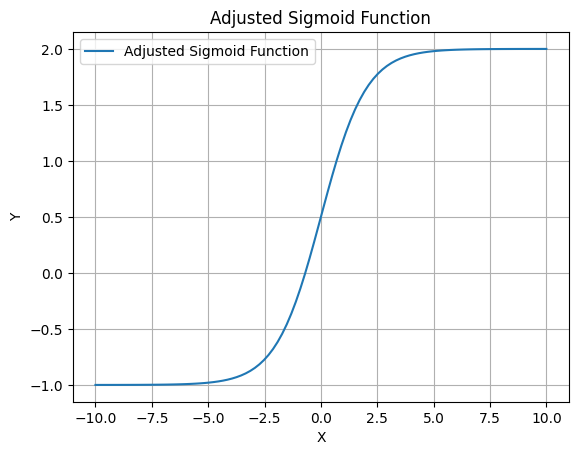

In [92]:
# T2.1d IMPORTANT: Please do not edit/remove this comment.

## Visualise the adjusted output 
X = np.linspace(-10,10,100)
Y = c1 * sigmoid(X) + c2

# Plot the adjusted sigmoid function
plt.plot(X, Y, label="Adjusted Sigmoid Function")
plt.title("Adjusted Sigmoid Function")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()

Make sure the graph is similar (in shape, not axis value) like the one below. Otherwise an incorrect sigmoid function will effect your results later on.

![sigmoid](./data/sigmoid.png)

<div class="alert alert-block alert-info">

### 2.2 Predicting class probabilities via logistic regression <a class="anchor" id="predict"></a>

You will now use your implemented sigmoid function to solve an actual classification problem using logistic regression. </br>
As discussed in the lecture, a prediction $\hat{y}$ can be obtained by using our logistic regression model via $\hat{y}=\sigma(\boldsymbol{w}^\top \boldsymbol{x})$

Note that for this example, we want to be able to use many samples at the same time - all of which are stored in one single vector $X$.

Also note that we predict the distribution over the classes, _i.e._ the probablity for each class. To get the 'hard' class label, we will later on assign everything below the probablity of 0.5 to class1 and any probability above to class2 (boundary could be included in either).

**(a) Load the dataset, inspect it, and fill the blanks in the Quiz Question**

In [93]:
# T2.2a IMPORTANT: Please do not edit/remove this comment.

# Components can be accessed like a dictionary after the file has been loaded, and the file contains the following:
# 'X_train' : training data we're going to use
# 'y_train' : labels for the training data
# 'X_test'  : test data we're going to use for evaluation, but NOT for training
# 'y_test'  : labels for the test data
# 'w_pret'  : a set of pretrained weights for the logistic regression model

# Read in the lab2_task2_data.npz using numpy
loaded_data = np.load('data/lab2_task2_data.npz')
X_train = loaded_data['X_train']
y_train = loaded_data['y_train']
X_test = loaded_data['X_test']
y_test = loaded_data['y_test']
w_pret = loaded_data['w_pret']
## Check the shape of the data!
# Note that we assume certain shapes of data for the basic logistic regression formulas to work,
# so make sure you understand which elements should be multiplied with each other!
# Hint: In case the data is stored in a different shape, you can easily transpose the matrices!

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))
print(np.shape(w_pret))


# print(y_train)

(600, 2)
(600, 1)
(200, 2)
(200, 1)
(2, 1)


**(b) Add side by side plots here to visualise your train and test data (Use 1x2 subplots).**

Here you need to visulize the second input variable w.r.t the first one (i.e. x-axis is first input variable, y-axis is second input variable) and then color the points by their label.

You may find **scatter plot** suitable, and your plots should be something like this one given below (points are random here and legend is not shown):

![rand_data](./data/rand_data.png)

**Reminder**: Please add axes labels, legend, and have your name and ID in the title of the plot.

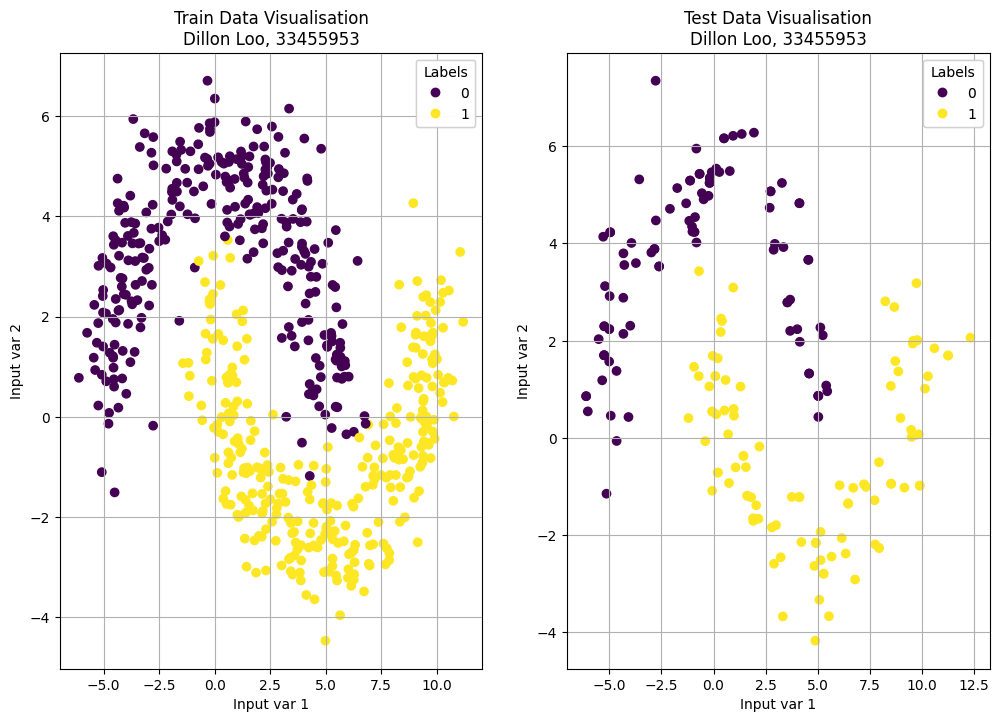

In [94]:
# T2.2b IMPORTANT: Please do not edit/remove this comment.

# Add side by side plots here to visualise your train and test data (Use subplots).
# Each unique class should be indicated a different color.

# Train data
X_train_feature1 = X_train[:, 0].reshape(-1,1)
X_train_feature2 = X_train[:, 1].reshape(-1,1)

# Test data
X_test_feature1 = X_test[:, 0].reshape(-1,1)
X_test_feature2 = X_test[:, 1].reshape(-1,1)

# Create 2x1 subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot 1: Train plot
scatter1 = axes[0].scatter(X_train_feature1, X_train_feature2, c=y_train, cmap = 'viridis', label='Train data')
axes[0].set_title('Train Data Visualisation\nDillon Loo, 33455953')
axes[0].set_xlabel('Input var 1')
axes[0].set_ylabel('Input var 2')
axes[0].grid(True)
legend1 = axes[0].legend(*scatter1.legend_elements(), title="Labels")
axes[0].add_artist(legend1)

# Plot 2: Test plot
scatter2 = axes[1].scatter(X_test_feature1, X_test_feature2, c=y_test, cmap = 'viridis', label='Train data')
axes[1].set_title('Test Data Visualisation\nDillon Loo, 33455953')
axes[1].set_xlabel('Input var 1')
axes[1].set_ylabel('Input var 2')
axes[1].grid(True)
legend1 = axes[1].legend(*scatter1.legend_elements(), title="Labels")
axes[1].add_artist(legend1)

fig.savefig('T2.2b.png', dpi=800, bbox_inches='tight')

**(c) Implement a logistic regression model**

You are now going to
- Implement a function to predict outcomes using a logistic regression model (taking in data $\boldsymbol{X}$ and parameters $\boldsymbol{w}$)
- Please note that the parameters $\boldsymbol{w}$ of shape $(\# input \, features , 1) $ and  $\boldsymbol{X}$ of size $(\# samples, \# input \, features)$  are passed as input arguments to your function and it should provide $\hat{y}$ (the probability) of size $(\# samples, 1)$ in the output.

In [95]:
# T2.2c IMPORTANT: Please do not edit/remove this comment.

# Write a prediction function -> We predict the output class probability, NOT the class label (no 0,1 rounding)
def predict(X, w):

    # Input argument(s):
    # X - the input data (#samples, #input features)
    # w - the weights from the trained model (#samples, 1) 
     
    # Output:
    # Probability prediction of each data point (y_hat)

    # pass input data to x
    x =  X

    # Perform Matrix multiplication between the inputs and the weights
    z = np.matmul(x,w)

    # probability
    y_hat = sigmoid(z)

    return y_hat 

**(d) Test your prediction function using the toy data set given in the quiz**

You can find the datapoints in the Quiz Question

Note define the toy data [number of samples, dim].

We also want the same to be true for our predictions, _i.e._ return them in the shape of [number of samples, 1] to match the input data.

In [96]:
# T2.2d IMPORTANT: Please do not edit/remove this comment.

## Define the toy input data

X_toy = np.array([[0.9, -0.2], [-0.3, 0.1], [-0.8, 0.7], [0.3, -0.1]])

## Obtain predictions using predict function and pretrained parameters w_pret
y_hat_toy = predict(X_toy,w_pret)

print(f'y_hat_toy_sum: {np.sum(y_hat_toy)}')

y_hat_toy_sum: 1.905774843821276


<div class="alert alert-block alert-info">

### 2.3 Training a model via Gradient Descent <a class="anchor" id="train"></a>
    
In this task, you will be writing code for the essential components to **train your own logistic model via Gradient Descent** given some training data. </br>
In detail, you are going to
- Implement a function that computes and returns **gradient and cost** of the logistic regression
- Write code to perform the actual **gradient descent algorithm** for a fixed number of iterations and **train your own logistic regression model** given some training data
- **Evaluate your model** on previously unseen test data points


As discussed in more detail during the lecture, we commonly use the so-called _Cross Entropy_ Loss to calculate the cost of our logistic regression problem. This loss function can be defined as </br>
</br>
\begin{equation}
    \mathcal{L}_{\mathrm{CE}}(\boldsymbol{w})= - \frac{1}{m}\sum_{i=1}^{m} \Big\lbrace y_i \log \Big(\underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big) + \left( 1 - y_i \right) \log \Big( 1- \underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big) \Big\rbrace
\end{equation}
</br>
In this notation, $\sigma(z) = 1 / (1 + \exp(-z))$ denotes the **sigmoid** function, and $(\boldsymbol{x}_1,y_1),(\boldsymbol{x}_2,y_2),\dots,(\boldsymbol{x}_m,y_m)$ with $\boldsymbol{x}_i \in \mathbb{R}^n, y_i \in \lbrace 0, 1\rbrace$ represent the $m$ training samples (with labels $y_i$). </br>
The gradient of the cross entropy loss w.r.t. the weights $\boldsymbol{w}$ can be written as
</br>

\begin{equation}
    \nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}} = \frac{1}{m}\sum_{i=1}^{m} \Big(\underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i} - y_i \Big) \boldsymbol{x}_i
\end{equation}
</br>

###  Gradient and Cost Computation

**(a) Implemnt the function**

In this part, we want to define a function that is able to compute our cross-entropy loss $\mathcal{L}_{\mathrm{CE}}$, as well as the gradient $\nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}}$ of our loss $\mathcal{L}_{\mathrm{CE}}$ _w.r.t._ the parameters $\boldsymbol{w}$, we want $\nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}}$ to be return of shape $(\# parameters, 1)$. 

As you can see above, all we need to compute the gradient vector is the prediction of the model $\hat{y}$ and the actual labels $y$, as well as the input data points $\boldsymbol{X}$. The loss itself is even more simple and only requires the predictions $\hat{y}$ and true labels $y$.

In the following function for the simplicity try to code $a$ and $b$, then create $\mathcal{L}_{\mathrm{CE}}$ loss out of them.
</br>
\begin{equation}
    \mathcal{L}_{\mathrm{CE}}(\boldsymbol{w})= - \frac{1}{m}\sum_{i=1}^{m} \Big\lbrace \underbrace{ y_i \log \Big(\underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big)}_{a} + \underbrace{\left( 1 - y_i \right) \log \Big( 1- \underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big)}_{b} \Big\rbrace
\end{equation}
</br>

In [97]:
# T2.3a IMPORTANT: Please do not edit/remove this comment.

def compute_loss_and_grad(X, y, y_hat):
    # Inputs:
    #    X - Set of samples (each sample is a row in X),
    #    y - Corresponding ground-truth labels
    #    y_hat - Predicted class probabilities

    # log(0) might throw error, so handled via small eps 
    eps = 1e-12

    # Compute the mean cross-entropy loss w.r.t. the parameters w (mean as defined in lecture)
    a = y * np.log(eps + y_hat)
    b = (1 - y) * np.log(1 + eps - y_hat)
    loss = np.mean(-(a + b))

    # Compute the gradient vector (mean over all samples as defined in lecture)
    # instead of using a loop, we can vectorised the operation, but need to ensure the final shape is correct
    grad_vec = np.matmul((y_hat - y).transpose(), X) / len(y)
    grad_vec = grad_vec.T # transpose to ensure the correct shape
    

    # Return loss and gradient vector
    return loss, grad_vec, grad_vec.shape

**(b) Apply the function**

Pass the datapoints given in the Quiz Question through the function you just implemented, and printout the loss, gradient and the shape of the gradient vector.

In [108]:
# # T2.3b IMPORTANT: Please do not edit/remove this comment.

Student_name = 'Dillon Loo Yi Ren'
X_toy = np.array([[-0.3, -0.15], [0.89, -0.02], [-0.35, 0.01], [0.26, -0.64]])
y_toy = np.array([[0], [1], [1], [0]])
y_hat_toy = predict(X_toy, w_pret)

loss, grad_vec, grad_vec_shape = compute_loss_and_grad(X_toy, y_toy, y_hat_toy)

# print the loss, sum of gradient, and the shape of the gradient
print(loss)
print(grad_vec.sum())
print(grad_vec_shape)

0.775270795439126
-0.16902883227711532
(2, 1)


**(c) Training with Gradient Descent**

Gradient descent, sometimes also referred to as _steepest descent_, is a popular first-order iterative optimisation method that has become ubiquitous in the machine and deep learning context. As you have heard in the lecture, the idea is to find the local minimum of a differentiable function by repeatedly taking steps in the opposite direction of the gradient of the function at the current point - i.e. in the direction of its steepest descent.

In this section of the lab, you are going to implement the **Gradient Descent algorithm** as a function that we can use afterwards to train our logistic regression model!

The main parts of the algorithm work as follows:
- Initialise hyperparameters like step-size aka learning rate, and number of iterations
- Randomly initialise the set of parameters $\boldsymbol{w}_{init}$ that shall be optimised
- For a certain number of iterations, do:
    - Obtain the prediction using the current weights $\boldsymbol{w}_i$ and training data $\boldsymbol{X}_{train}$
    - Compute the loss $\mathcal{L}_{\mathrm{CE}}$ and the gradient vector $\nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}}$ w.r.t. the current parameters $\boldsymbol{w}_i$
    - Update the parameters using the gradient vector and learning rate _lr_
- After all iterations are finished, return the final optimised set of parameters

In addition, we ask you to also:
- Return a list of all losses (one value for each iteration)
- Return a list of all gradient vectors (one vector for each iteration)
- Implement an option via the argument "logging" to switch on printing a string containing the 'iteration' and the 'loss' for each iteration



**Very Important:**
Note that the inputs to this function are:
- initial set of parameters $\boldsymbol{w}_{init}$ of shape $(\# input \, features, 1) $
- the hyperparameters #epochs and learning rate
- the training data $\boldsymbol{X}_{train}$ of shape $(\# samples, \# input \, features)$ 
- the corresponding labels $\boldsymbol{y}_{train}$ of shape $(\# samples, 1)$ 

and the outputs should be 
- a list of all losses 
- a list of all gradient vetors and each gradient vector must be of shape $(1, \# input \, features) $
- the final weight $\boldsymbol{w}^{*}$ of shape $(\# input \, features, 1) $ 

In [111]:
## Setting some hyperparameters:
lr = 0.5         # Learning rate
num_epochs = 20    # Number of iterations

In [112]:
# T2.3c IMPORTANT: Please do not edit/remove this comment.

def gradient_descent(w_init, num_epochs, lr, X_train, y_train, logging=False):
    ## Create empty lists to store the values for loss and gradient vector over all
    #  'num_epochs' iterations of our gradient descent optimisation procedure
    losses = []
    grad_vecs = []

    # Init the parameters
    w = w_init

    ## Implement the actual gradient descent using the previously implemented functions
    for ep in range(num_epochs):
        # Compute prediction using current weights
        preds =  predict(X_train, w)
        loss, grad_vec, grad_vec_shape = compute_loss_and_grad(X_train, y_train, preds) 
        w = w - lr * grad_vec

        losses.append(loss)
        grad_vecs.append(grad_vec)

        if logging:
            print(f'Ep {ep+1:2d} | Loss: {loss:.3f}')

    return w, losses, grad_vecs

**(d) Now training time!**

Use the initial weights given in the Quiz Question, and run the gradient descent algorithm for 20 epochs.

In [116]:
# T2.3d IMPORTANT: Please do not edit/remove this comment.

## Run the function on the training set
## Start from given initial weight in the quiz
w_init = np.array([[5], [-10]])

# Obtain the final weights via gradient descenta
w_final, _, _ = gradient_descent(w_init, 20, lr, X_train, y_train)
print(w_final)

[[ 2.19965343]
 [-9.28610629]]


<div class="alert alert-block alert-info">

### 2.4 Evaluating the trained model <a class="anchor" id="evaluate"></a>

After you have obtained your optimised set of parameters $\boldsymbol{w}^{*}$, let's see how your model performs! </br>

**(a) You are going to do the following:**

- Obtain the predictions (class probabilities) $\hat{y}_{train}$ for the training data $\boldsymbol{X}_{train}$ using $\boldsymbol{w}^{*}$
- Obtain the predictions (class probabilities) $\hat{y}_{test}$ for the test data $\boldsymbol{X}_{test}$ using $\boldsymbol{w}^{*}$
- Convert these into the actual predicted labels (everything with probability >=0.5 is more likely to be of class 1 and thus gets label '1' assigned ; below gets label '0')
- Count how many samples have been correctly classified and compute the percentage (_i.e._, the accuracy in %)
- Report your obtained accuracies for both training and test data

In [102]:
# T2.4a IMPORTANT: Please do not edit/remove this comment.

## Evaluate the obtained model on previously unseen test data

# Obtain predicted class probabilities for test data
y_hat_test  = predict(X_test, w_final)

# Obtain class labels
c_hat_test = np.where(y_hat_test >= 0.5, 1, 0)

# Evaluate the classification accuracy
acc_test = np.sum(c_hat_test == y_test) / len(y_test)

print(f"Test Accuracy: {acc_test:.2f}")


Test Accuracy: 0.84


**(b) Print out train and test accuracy if you start training from the given initial weight in the quiz Task 2.4(b)**

- You should repeat gradient decsent starting from the $w_{init}$ and obtain $w^{*}$
- Then calculate the accuracy on test and train set for the model with weights $w^{*}$
- print the accuracy for both train and test set.

In [103]:
# T2.4b IMPORTANT: Please do not edit/remove this comment.

## Repeat training model from given initial weight in the quiz
w_init = np.array([[5], [-5]])
w_final, _, _ = gradient_descent(w_init, 20, lr, X_train, y_train)

# Obtain predicted class probabilities for train and test data
y_hat_train = predict(X_train, w_final)
y_hat_test = predict(X_test, w_final)

# Obtain actual class labels for training and test data
c_hat_train =  np.where(y_hat_train >= 0.5, 1, 0)
c_hat_test =  np.where(y_hat_test >= 0.5, 1, 0)

# Evaluate the classification accuracy for training and test data
acc_train = np.sum(c_hat_train == y_train) / len(y_train)
acc_test = np.sum(c_hat_test == y_test) / len(y_test)

# Print outputs
print(f'Training accuracy: {acc_train:.3f}')
print(f'Test accuracy: {acc_test:.3f}')

Training accuracy: 0.867
Test accuracy: 0.845


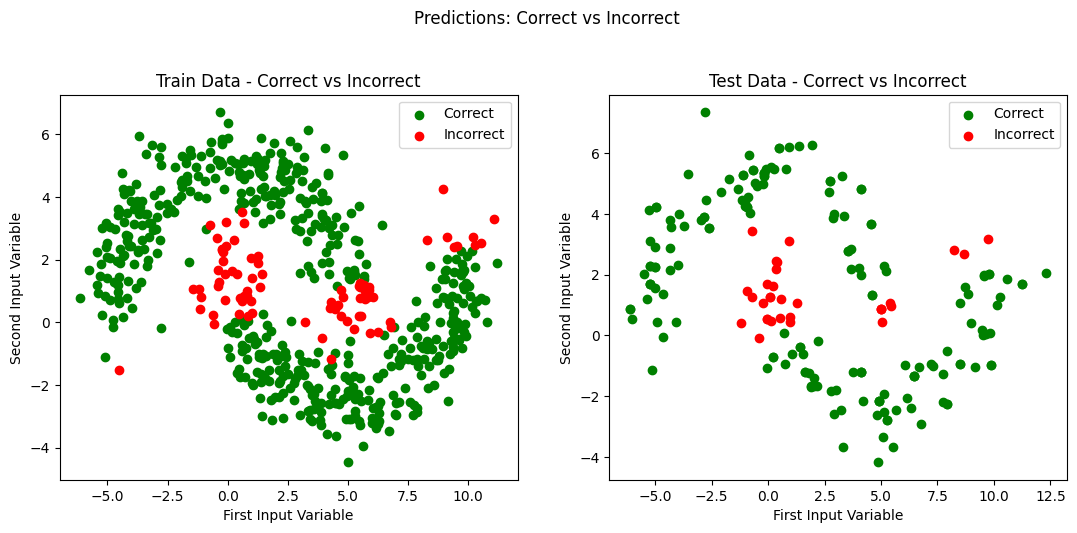

In [104]:
# Optional: plot a scatter plot similar to 2.2(b), but this time visualize correct vs incorrect prediction
# instead of class 1 vs class 0. If correct, you should be able to see the linearity of the decision boundary

correct_train = (c_hat_train == y_train).flatten()
correct_test = (c_hat_test == y_test).flatten()

# Plot the training data with correct vs incorrect classifications
plt.figure(figsize=(13, 5))
plt.subplots_adjust(hspace=0.5)

plt.subplot(1, 2, 1)
plt.scatter(X_train[correct_train, 0], X_train[correct_train, 1], c='green', label="Correct")
plt.scatter(X_train[~correct_train, 0], X_train[~correct_train, 1], c='red', label="Incorrect")
plt.title('Train Data - Correct vs Incorrect')
plt.xlabel('First Input Variable')
plt.ylabel('Second Input Variable')
plt.legend()

# Plot the test data with correct vs incorrect classifications
plt.subplot(1, 2, 2)
plt.scatter(X_test[correct_test, 0], X_test[correct_test, 1], c='green', label="Correct")
plt.scatter(X_test[~correct_test, 0], X_test[~correct_test, 1], c='red', label="Incorrect")
plt.title('Test Data - Correct vs Incorrect')
plt.xlabel('First Input Variable')
plt.ylabel('Second Input Variable')
plt.legend()
plt.suptitle('Predictions: Correct vs Incorrect', y=1.05)
plt.show()

<div class="alert alert-block alert-success">

#### Reflection

Based on the Code tasks you have done, select the incorrect statement from the given list in the quiz.



<div class="alert alert-block alert-info">

## Task 3 - Analysing convergence and accuracy <a class="anchor" id="analyse-convergence-and-accuracy"></a>
In this section, your task involves examining logistic regression models using various hyper-parameter configurations and assessing their convergence behavior. Our previous choice of hyperparameters (i.e. the learning rate) might not be the best possible one (or even close to it). You will now choose the best possbile learning rate based on the given set of learning rates. Feel free to re-use your functions from previous sections.

### Learning Objective 
By the end of this lab task, the you will be able to:
- Analyze and compare the test accuracy of the logistic regression model with different hyperparameter settings.
- Evaluate the training convergence of the logistic regression model during the training process and identify any general trends in the convergence behavior.
- Assess whether the model shows signs of overfitting on the given dataset by analyzing the training vs. test accuracy.
- Describe their observations regarding the relationship between the choice of learning rates, convergence results, and accuracy on the training and test data.

**(a) Try different learning rates**

- A list of learning rates and the number of training epochs are given in the quiz
- The initial weight is fixed for all the training scenarios  $w_{init} = [-2 \quad 2]^T$
- Repeat training the model for all learning rates given in the list (hint: use a $for$ loop)
- Visualize the loss of each training w.r.t. epochs for all given learning rates in the list in **one** graph (no separate or subplots). 
- Each loss curve must have a legend of corresponding learning rate. 
- Please add your name and Student ID to the title of the plot.

In [105]:
## Provided list of learning rates to train on:
lrs = np.array([[0.05], [0.1], [0.5], [2]]).flatten()
# Max number of iterations for GD algorithm to run
num_epochs = 30

# ================================================
# Fix the initial point. Do not change this
w_init = np.array([[-2] , [2]])
# ================================================

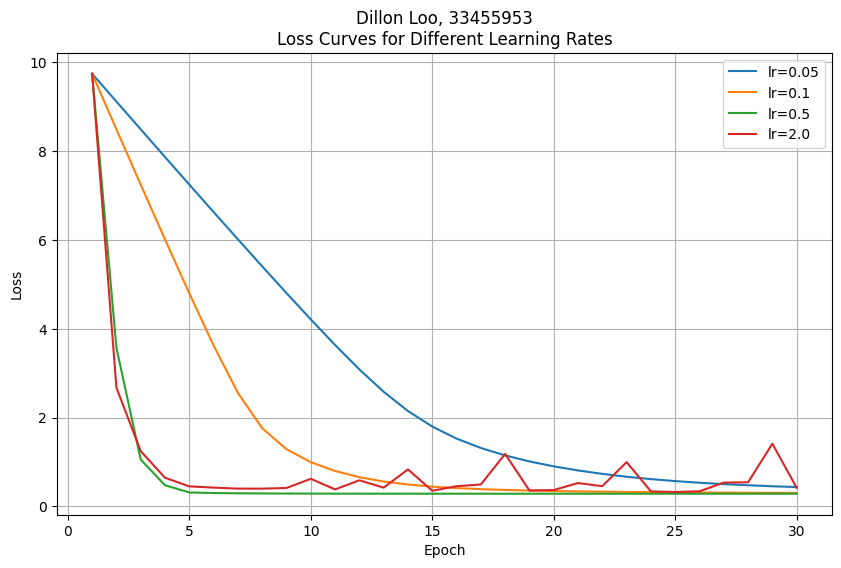

In [106]:
# T3a IMPORTANT: Please do not edit/remove this comment.

## Run gsetradient descent for all learning rates, and plot results

losses_dict = {}
# Run gradient descent for all learning rates
for i in lrs:
    # Train the model using gradient descent
    w_final, losses, _ = gradient_descent(w_init, num_epochs, i, X_train, y_train)
    
    # Store the losses for this learning rate
    losses_dict[i] = losses

plt.figure(figsize=(10, 6))

for lr, losses in losses_dict.items():
    plt.plot(range(1, num_epochs + 1), losses, label=f'lr={lr}')

plt.title('Dillon Loo, 33455953\nLoss Curves for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('T3a')
plt.show()

**(b) Fill the blanks in the Quiz Question, based on your analysis**

**(c) Write evaluate() function that takes input $X$, output $y$, and the final weight $w^*$ and calculates accuracy.**

- Repeat training the model by all the given learning rates and number of epochs (hit: use a $for$ loop)
- While training, record the final weight $w^*$ for each learning rate.
- Apply the evaluate() function to calculate the accuracy of the different models you have trained.
- Print the test and train accuracy (round to 3 decimal places) next to the corresponding learning rate.

In [107]:
# T3c IMPORTANT: Please do not edit/remove this comment.

## Run gradient descent for all learning rates, and store the final weight for each one
final_weights = {}
for lr in lrs:
    w_final, _, _ = gradient_descent(w_init, num_epochs, lr, X_train, y_train)
    final_weights[lr] = w_final

# Evaluating the stored parameter sets to retrieve train and test accuracies
def evaluate(X,y,w):
    # Obtain predicted class probabilities
    y_hat = sigmoid(np.dot(X,w))

    # Obtain actual class labels (everything >=0.5 is class1, rest class0)
    c_hat = np.where(y_hat >= 0.5, 1, 0)

    # Evaluate the classification accuracy for training and test data
    acc = np.sum(c_hat == y) / len(y_hat)
    return acc

print(' >>> Training accuracies for different learning rates: <<<')
train_accuracies = {}
for lr, w in final_weights.items():
    acc = evaluate(X_train, y_train, w)
    train_accuracies[lr] = acc
    print(f'Learning rate {lr}: {acc:.4f}')

print('\n >>> Test accuracies for different learning rates: <<<')
test_accuracies = {}
for lr, w in final_weights.items():
    acc = evaluate(X_test, y_test, w)
    test_accuracies[lr] = acc
    print(f'Learning rate {lr}: {acc:.4f}')

# best_lr = max(test_accuracies, key=test_accuracies.get)
# print(f"Model trained by learning rate {best_lr} is the best model")

 >>> Training accuracies for different learning rates: <<<
Learning rate 0.05: 0.8100
Learning rate 0.1: 0.8633
Learning rate 0.5: 0.8700
Learning rate 2.0: 0.8433

 >>> Test accuracies for different learning rates: <<<
Learning rate 0.05: 0.8200
Learning rate 0.1: 0.8450
Learning rate 0.5: 0.8400
Learning rate 2.0: 0.8050


<div class="alert alert-block alert-danger">

# <p style="text-align: center;">The End</p>